In [16]:
import pandas as pd
import numpy as np
import os 
import statistics 
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [2]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')

In [3]:
print(updatedchoicedata)

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    595727bd7c76640001aa8f6e                 0                1.0   
4    595727bd7c76640001aa8f6e                 1                1.0   
..                        ...               ...                ...   
199  641361334c91a0c6ff4c5b79                 1                1.0   
200  641361334c91a0c6ff4c5b79                 2                1.0   
201  641a3df3c874807a1a8734bc                 0                1.0   
202  641a3df3c874807a1a8734bc                 1                1.0   
203  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0              4.0          5.0             5.0  0.833333     -0.5           1

In [5]:
import pingouin as pg
from pingouin import ttest

anovachoice = pg.rm_anova(data=updatedchoicedata, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [6]:
print(anovachoice)

             Source        SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.082809    2  0.041405  1.591366  0.207471   0.210256   
1             Error  3.486447  134  0.026018       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.002409  0.878738      False  0.862005  0.007444  
1       NaN       NaN        NaN       NaN       NaN  


In [9]:
anovasalience = pg.rm_anova(data=updatedchoicedata, dv='salience_mean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovasalience)

             Source         SS   DF         MS          F         p-unc  \
0  condition_recode  40.816176    2  20.408088  42.496705  5.094966e-15   
1             Error  64.350490  134   0.480228        NaN           NaN   

      p-GG-corr       ng2       eps sphericity   W-spher   p-spher  
0  6.460215e-15  0.177868  0.991826       True  0.991759  0.761036  
1           NaN       NaN       NaN        NaN       NaN       NaN  


In [10]:
anovastress = pg.rm_anova(data=updatedchoicedata, dv='recoded_stress', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovastress)

             Source          SS   DF        MS         F    p-unc  p-GG-corr  \
0  condition_recode   18.154412    2  9.077206  9.489435  0.00014   0.000159   
1             Error  128.178922  134  0.956559       NaN      NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.019772  0.978825       True  0.978367  0.485907  
1       NaN       NaN        NaN       NaN       NaN  


In [8]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)


In [12]:
rej_accstressttest = ttest(rej['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d     BF10  power
T-test -4.11   67        less    0.0  [-inf, -0.43]     0.35  386.792   0.88


In [13]:
rej_neustressttest = ttest(rej['recoded_stress'], neu['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_neustressttest)

           T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -2.47   67        less   0.01  [-inf, -0.14]     0.19  4.427   0.46


In [14]:
neu_accstressttest = ttest(neu['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(neu_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -1.98   67        less   0.03  [-inf, -0.05]     0.15  1.677   0.34


In [15]:
rej_accsaliencettest = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_accsaliencettest)

          T  dof alternative  p-val         CI95%  cohen-d       BF10  power
T-test -9.2   67        less    0.0  [-inf, -0.9]      1.2  9.163e+10    1.0


In [16]:
rej_neusaliencettest = ttest(rej['salience_mean'], neu['salience_mean'], paired=True, alternative='less').round(2)
print(rej_neusaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d      BF10  power
T-test -4.71   67        less    0.0  [-inf, -0.35]     0.55  2795.068    1.0


In [17]:
neu_accsaliencettest = ttest(neu['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(neu_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d      BF10  power
T-test -4.53   67        less    0.0  [-inf, -0.35]     0.55  1525.471    1.0


In [18]:
print(rej)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
63  63eac31811a6da58d4f32d76                 1                1.0   
64  63fac97f0d4e8f6bfd753d90                 1                1.0   
65  64023a98627b1116180dff0b                 1                1.0   
66  641361334c91a0c6ff4c5b79                 1                1.0   
67  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0             1.5          4.5             4.5  1.000000     -0.5           1  
1          

In [19]:
print(len(rej))
print(len(neu))
print(len(acc))

68
68
68


In [20]:
mostaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==1].reset_index(drop=True)
leastaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==0].reset_index(drop=True)

In [21]:
print(len(mostaffectedpps))

120


In [22]:
mostaffectedanovachoice = pg.rm_anova(data=mostaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [23]:
print(mostaffectedanovachoice)

             Source        SS  DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.025705   2  0.012853  0.408484  0.666071   0.650227   
1             Error  2.454188  78  0.031464       NaN       NaN        NaN   

        ng2      eps sphericity   W-spher   p-spher  
0  0.001398  0.92476       True  0.918638  0.199408  
1       NaN      NaN        NaN       NaN       NaN  


In [24]:
leastaffectedanovachoice = pg.rm_anova(data=leastaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [25]:
print(leastaffectedanovachoice)

             Source        SS  DF        MS        F     p-unc  p-GG-corr  \
0  condition_recode  0.069120   2  0.034560  1.82921  0.170348    0.18321   
1             Error  1.020243  54  0.018893      NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.004682  0.679211      False  0.527704  0.000246  
1       NaN       NaN        NaN       NaN       NaN  


In [9]:
#proportion of self-choice in neutral condition
rejchoice_mean = rej['choice'].mean()
rejchoice_std = rej['choice'].std()
print('rejchoice_mean')
print(rejchoice_mean)
print('rejchoice_std')
print(rejchoice_std)

rejchoice_mean
0.4349376114081997
rejchoice_std
0.4102091925441811


In [27]:
accchoice_mean = acc['choice'].mean()
accchoice_std = acc['choice'].std()
print('accchoice_mean')
print(accchoice_mean)
print('accchoice_std')
print(accchoice_std)

accchoice_mean
0.38589572192513366
accchoice_std
0.39626632952670887


In [28]:
neuchoice_mean = neu['choice'].mean()
neuchoice_std = neu['choice'].std()
print('neuchoice_mean')
print(neuchoice_mean)
print('neuchoice_std')
print(neuchoice_std)

neuchoice_mean
0.4056372549019608
neuchoice_std
0.4318056720626993


In [10]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
brcs = pd.read_csv('%s/scoring/brcs.csv'%(current_dir))
erq = pd.read_csv('%s/scoring/erq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
pss = pd.read_csv('%s/scoring/pss.csv'%(current_dir))
rsq = pd.read_csv('%s/scoring/rsq.csv'%(current_dir))

In [11]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']
print(len(rejchoice))
print(len(accchoice))
print(len(neuchoice))
print(len(aq))

68
68
68
68


In [31]:
print(aq)

                 Prolific_ID  AQ
0   568d286ab5a2c2000cb6a91c  24
1   595727bd7c76640001aa8f6e  33
2   5a4636c92f91ec0001dcba07  32
3   5ad2c8334d061300011b1985  11
4   5adef850eb60400001539109  21
..                       ...  ..
63  63eac31811a6da58d4f32d76  16
64  63fac97f0d4e8f6bfd753d90  30
65  64023a98627b1116180dff0b  30
66  641361334c91a0c6ff4c5b79  10
67  641a3df3c874807a1a8734bc  20

[68 rows x 2 columns]


In [12]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']

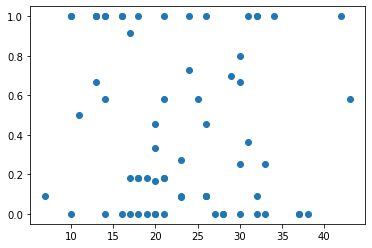

[[ 0.16827158 -0.42946231]
 [-0.42946231 68.40100966]]


NameError: name 'pearsonr' is not defined

In [14]:
# prop_choicerej // aq
import matplotlib.pyplot as plt
from matplotlib import pyplot

pyplot.scatter(aq['AQ'],rejchoice)
pyplot.show()
covariance = cov(rejchoice, aq['AQ'])
print(covariance)
corr, _ = pearsonr(rejchoice, aq['AQ'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, aq['AQ'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

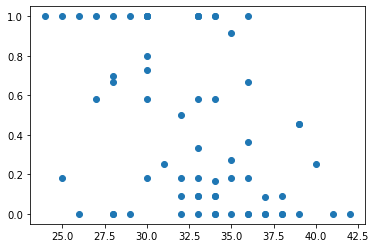

[[ 0.16827158 -0.70963764]
 [-0.70963764 16.7928007 ]]


NameError: name 'pearsonr' is not defined

In [15]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],rejchoice)
pyplot.show()
covariance = cov(rejchoice, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(rejchoice, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

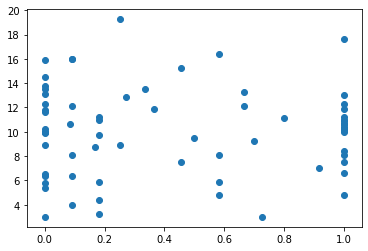

[[ 1.68271582e-01 -5.64274217e-03]
 [-5.64274217e-03  1.32002956e+01]]
Pearsons correlation: -0.004
p value: 0.9756
Accept null hypothesis that the means are equal.


In [35]:
# prop_choicerej // rsq
pyplot.scatter(rejchoice, rsq["RSQ_finalscore"])
pyplot.show()
covariance = cov(rejchoice, rsq["RSQ_finalscore"])
print(covariance)
corr, _ = pearsonr(rejchoice, rsq["RSQ_finalscore"])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, rsq["RSQ_finalscore"])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

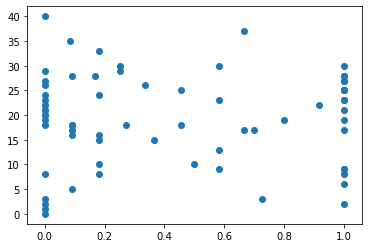

[[ 0.16827158  0.10081544]
 [ 0.10081544 85.85425812]]
Pearsons correlation: 0.027
p value: 0.8300
Accept null hypothesis that the means are equal.


In [36]:
# prop_choicerej // pss
pyplot.scatter(rejchoice, pss["PSS_score"])
pyplot.show()
covariance = cov(rejchoice, pss["PSS_score"])
print(covariance)
corr, _ = pearsonr(rejchoice, pss["PSS_score"])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, pss["PSS_score"])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

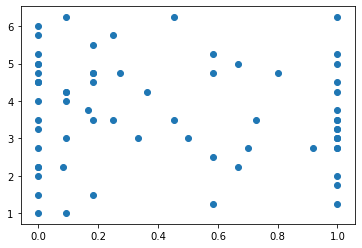

[[ 0.16827158 -0.06611395]
 [-0.06611395  1.87548014]]
Pearsons correlation: -0.118
p value: 0.3392
Accept null hypothesis that the means are equal.


In [37]:
# prop_choicerej // erq emotional suppression
pyplot.scatter(rejchoice, erq['ERQ_emosuppression'])
pyplot.show()
covariance = cov(rejchoice, erq['ERQ_emosuppression'])
print(covariance)
corr, _ = pearsonr(rejchoice, erq['ERQ_emosuppression'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, erq['ERQ_emosuppression'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

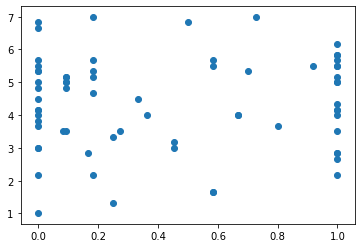

[[0.16827158 0.0235487 ]
 [0.0235487  1.99553702]]
Pearsons correlation: 0.041
p value: 0.7421
Accept null hypothesis that the means are equal.


In [38]:
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(rejchoice, erq['ERQ_cogreappraisal'])
pyplot.show()
covariance = cov(rejchoice, erq['ERQ_cogreappraisal'])
print(covariance)
corr, _ = pearsonr(rejchoice, erq['ERQ_cogreappraisal'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, erq['ERQ_cogreappraisal'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

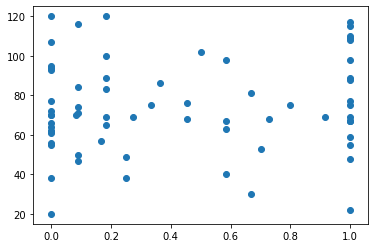

[[1.68271582e-01 8.87437146e-01]
 [8.87437146e-01 5.41985953e+02]]
Pearsons correlation: 0.093
p value: 0.4510
Accept null hypothesis that the means are equal.


In [39]:
# prop_choicerej // scs
pyplot.scatter(rejchoice, scs["SCS_score"])
pyplot.show()
covariance = cov(rejchoice, scs["SCS_score"])
print(covariance)
corr, _ = pearsonr(rejchoice, scs["SCS_score"])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, scs["SCS_score"])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

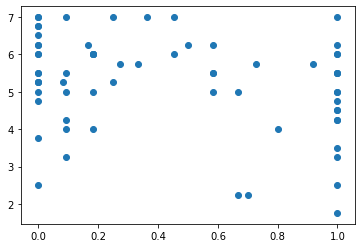

[[ 0.16827158 -0.14910674]
 [-0.14910674  1.61940299]]
Pearsons correlation: -0.286
p value: 0.0182
Reject the null hypothesis that the means are equal.


In [40]:
# prop_choicerej // srq admiration
pyplot.scatter(rejchoice, srq["SCS_score"])
pyplot.show()
covariance = cov(rejchoice, srq["SCS_score"])
print(covariance)
corr, _ = pearsonr(rejchoice, srq["SCS_score"])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, srq["SCS_score"])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

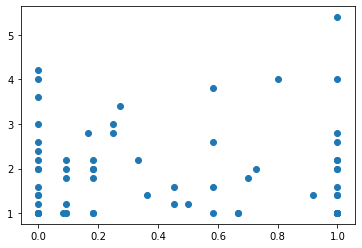

[[1.68271582e-01 2.14435842e-04]
 [2.14435842e-04 9.95539947e-01]]
Pearsons correlation: 0.001
p value: 0.9966
Accept null hypothesis that the means are equal.


In [41]:
# prop_choicerej // srq negsocpot
pyplot.scatter(rejchoice, srq['SRQ_negsocpot'])
pyplot.show()
covariance = cov(rejchoice, srq['SRQ_negsocpot'])
print(covariance)
corr, _ = pearsonr(rejchoice, srq['SRQ_negsocpot'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, srq['SRQ_negsocpot'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
# prop_choicerej // srq prosocint
pyplot.scatter(rejchoice, srq['SRQ_prosocint'])
pyplot.show()
covariance = cov(rejchoice, srq['SRQ_negsocpot'])
print(covariance)
corr, _ = pearsonr(rejchoice, srq['SRQ_negsocpot'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, srq['SRQ_negsocpot'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')